In [2]:
# Importando Bibliotecas que serão utilizadas neste DataFrame 
import pandas as pd # biblioteca responsavel para tratamento e linoeza de dados  
import numpy as np # biblioteca utilizada para tratamento e eficiencia em dados numericos 
import datetime #biblioteca utilizada para trabalhar com datas 

In [11]:
#importando dados para o google coolabs 
from google.colab import files 
uploaded = files.upload()

Saving datasets_14370_19291_pima-indians-diabetes.csv to datasets_14370_19291_pima-indians-diabetes.csv


In [12]:
#importando um novo dataset
pima_dataset = pd.read_csv('datasets_14370_19291_pima-indians-diabetes.csv', header=None)
pima_dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0. Numero de Vezes que ficou gravida 
1. Concentração de Glocose no plasma 
2. Pressão diastolica (mm hg)
3. Triceps skinfold thinkness (mm)
4. insulina em Jejum (mu U/ml)
5. Indice de massa corporal (weight in kg/(height in m)^2
6. Diabetes pedigree function 
7. Idade
8. Possui ou não Diabetes


In [13]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
pima_dataset.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
print (pima_dataset.describe()) #resumo das estatisticas descritivas do dataset

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [16]:
pima_dataset.drop(columns=[0,8], axis=1)[pima_dataset.eq(0).any(1)]#verificando onde existem valores estranhos igais a 0 - coluna 0 e 8 podem ter valores nulos 

,1,2,3,4,5,6,7
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [17]:
#contando a quantidade de valores nulos em cada uma das colunas que não podem 
print((pima_dataset[[1,2,3,4,5]]==0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [18]:
#substituindo os valores 0 por Nan 
pima_dataset[[1,2,3,4,5]] = pima_dataset[[1,2,3,4,5]].replace(0, np.NaN)

In [20]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       763 non-null    float64
 2   2       733 non-null    float64
 3   3       541 non-null    float64
 4   4       394 non-null    float64
 5   5       757 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [21]:
pima_dataset.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

In [22]:
pima_dataset.head(20)

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [23]:
#apenas remvendo as colunas que contem valores nulos 
df_remove_nan=pima_dataset.dropna()
df_remove_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       392 non-null    int64  
 1   1       392 non-null    float64
 2   2       392 non-null    float64
 3   3       392 non-null    float64
 4   4       392 non-null    float64
 5   5       392 non-null    float64
 6   6       392 non-null    float64
 7   7       392 non-null    int64  
 8   8       392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [24]:
df_remove_nan.head()

,0,1,2,3,4,5,6,7,8
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [25]:
pima_dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


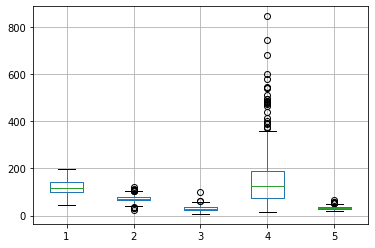

In [26]:
pima_dataset.boxplot([1,2,3,4,5]) #bolinhas fora das caixas indicam possiveis outliers 

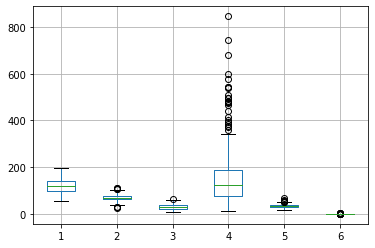

In [27]:
df_remove_nan.boxplot([1,2,3,4,5,6]) #visualizando boxplot com valores nulos retirados 

In [28]:
#preenchendo os valores com a média 
df_nan_media=pima_dataset.fillna(pima_dataset.mean())
df_nan_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [29]:
df_nan_media.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
